In [7]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model as lm
import sklearn.cross_validation as cv
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

In [11]:
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [12]:


data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()



In [13]:
data_np = data.astype(np.int32).values
X = data_np[:,:-1]
y = data_np[:,-1]

In [14]:
# We define a few boolean vectors.
female = X[:,0] == 1
survived = y == 1
# This vector contains the age of the passengers.
age = X[:,1]
# We compute a few histograms.
bins_ = np.arange(0, 81, 5)
S = {'male': np.histogram(age[survived & ~female], 
                          bins=bins_)[0],
     'female': np.histogram(age[survived & female], 
                            bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female], 
                          bins=bins_)[0],
     'female': np.histogram(age[~survived & female], 
                            bins=bins_)[0]}

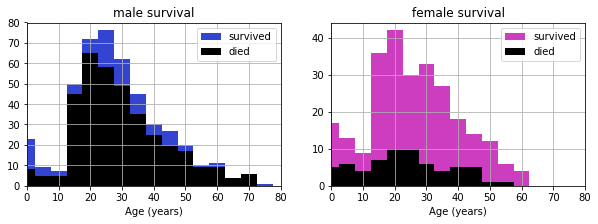

In [15]:
# We now plot the data.
bins = bins_[:-1]
plt.figure(figsize=(10,3));
for i, sex, color in zip((0, 1),
                         ('male', 'female'),
                         ('#3345d0', '#cc3dc0')):
    plt.subplot(121 + i);
    plt.bar(bins, S[sex], bottom=D[sex], color=color,
            width=5, label='survived');
    plt.bar(bins, D[sex], color='k', width=5, label='died');
    plt.xlim(0, 80);
    plt.grid(None);
    plt.title(sex + " survival");
    plt.xlabel("Age (years)");
    plt.legend();

In [16]:


# We split X and y into train and test datasets.
(X_train, X_test, 
 y_train, y_test) = cv.train_test_split(X, y, test_size=.05)



In [17]:
# We instanciate the classifier.
logreg = lm.LogisticRegression();

In [18]:


logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)



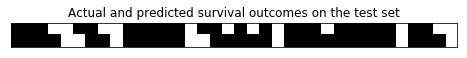

In [19]:


plt.figure(figsize=(8, 3));
plt.imshow(np.vstack((y_test, y_predicted)),
           interpolation='none', cmap='bone');
plt.xticks([]); plt.yticks([]);
plt.title(("Actual and predicted survival outcomes"
          " on the test set"));



In [20]:
cv.cross_val_score(logreg, X, y)

array([ 0.78661088,  0.78991597,  0.78059072])

In [21]:


grid = gs.GridSearchCV(logreg, {'C': np.logspace(-5, 5, 200)}, n_jobs=4)
grid.fit(X_train, y_train);
grid.best_params_



{'C': 0.10473708979594508}

In [22]:
cv.cross_val_score(grid.best_estimator_, X, y)

array([ 0.79079498,  0.78991597,  0.77637131])